# Data Visualization

Data visualization refers to the techniques used to communicate data or information by encoding it as visual objects (e.g., points, lines or bars) contained in graphics. The goal is to communicate information clearly and efficiently to users. See [Wikipedia's Data Visualization Page](https://en.wikipedia.org/wiki/Data_visualization)

## Python Plotting Libraries

+ [Matplotlib](https://matplotlib.org/)
+ [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
+ [Seaborn](https://seaborn.pydata.org/)
+ [ggplot](http://ggplot.yhathq.com/)
+ [plotly](https://plot.ly/python/)
+ [Boken](http://bokeh.pydata.org/en/latest/)

# Dataset

1. [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews/)
2. [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
import re

attributeRE = re.compile(r"7.\s+Attribute Information:")
missingValueRE = re.compile("8. Missing Attribute Values:")

with open("datasets\\Iris\\iris.names", "r") as f:
    lines = f.readlines()

start_idx = np.nan
idx = 0
for line in lines:
    # print(line)
    if attributeRE.search(line):
        start_idx = idx + 1
    if missingValueRE.search(line):
        stop_idx = idx
    idx = idx + 1

#print(start_idx, lines[start_idx])
#print(stop_idx, lines[stop_idx])

attributeLineRE = re.compile("^\s*\d+.\s+([:\w\s]+)$")
fields = []
for line in lines[start_idx:stop_idx]:
    line = line.rstrip()
    m = attributeLineRE.match(line)
    if m:
        field = m.group(1)
        field = field.replace(':', '').replace(' ', '_')
        fields.append(field)
        
print(fields)

with open("datasets\\Iris\\iris.csv", "w") as f:
    f.write(",".join(fields))
    f.write("\n")
    with open("datasets\\Iris\\iris.data", "r") as inf:
        lines = inf.readlines()
        f.writelines(lines)

['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'class']


In [89]:
iris = pd.read_csv("datasets\\Iris\\iris.csv")
iris.head(3)
cols_map = {c: c.replace("_in_cm", "") for c in iris.columns}

In [90]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [72]:
iris.rename(columns=cols_map, inplace=True)

In [83]:
iris.drop(columns=["Unnamed: 0"], inplace=True)

In [85]:
iris.set_index(pd.Series(range(0, iris.shape[0])), inplace=True)

In [86]:
iris.to_csv("datasets\\Iris\\iris.csv", index=False)

In [88]:
iris = pd.read_csv("datasets\\Iris\\iris.csv")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Draw Scatter

In [94]:
%matplotlib inline

### Basic Scatter

Text(0, 0.5, 'sepal_width')

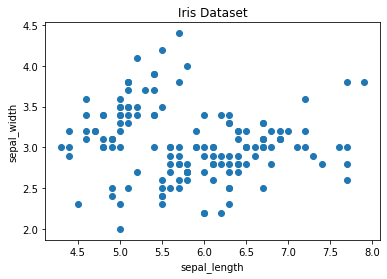

In [99]:
fig, ax = plt.subplots()
ax.scatter(iris['sepal_length'], iris["sepal_width"])
ax.set_title("Iris Dataset")
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")

### Color by Class

Text(0, 0.5, 'sepal_width')

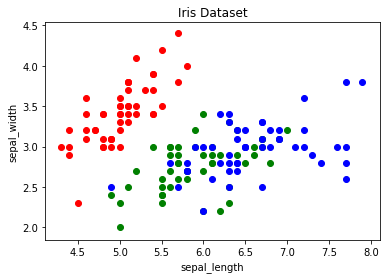

In [102]:
dfs = {}
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
for kind in colors.keys():
    dfs[kind] = iris.loc[iris["class"] == kind]
fig, ax = plt.subplots()
for kind in colors.keys():
    ax.scatter(dfs[kind]['sepal_length'], dfs[kind]["sepal_width"], color=colors[kind])
ax.set_title("Iris Dataset")
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")

Text(0, 0.5, 'sepal_width')

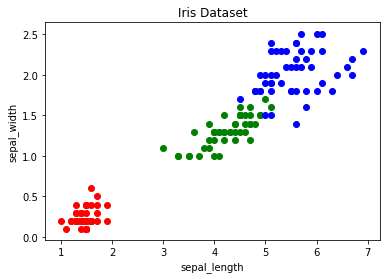

In [103]:
dfs = {}
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
for kind in colors.keys():
    dfs[kind] = iris.loc[iris["class"] == kind]
fig, ax = plt.subplots()
for kind in colors.keys():
    ax.scatter(dfs[kind]['petal_length'], dfs[kind]["petal_width"], color=colors[kind])
ax.set_title("Iris Dataset")
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")

In [105]:
def scatter_plot(v1, v2):
    dfs = {}
    colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
    for kind in colors.keys():
        dfs[kind] = iris.loc[iris["class"] == kind]
    fig, ax = plt.subplots()
    for kind in colors.keys():
        ax.scatter(dfs[kind][v1], dfs[kind][v2], color=colors[kind])
    ax.set_title("Iris Dataset")
    ax.set_xlabel(v1)
    ax.set_ylabel(v2)

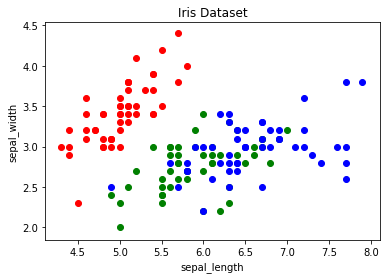

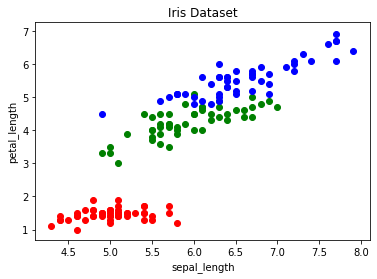

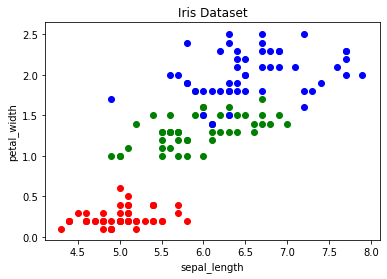

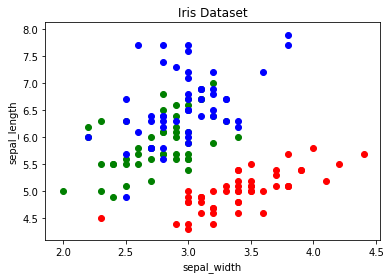

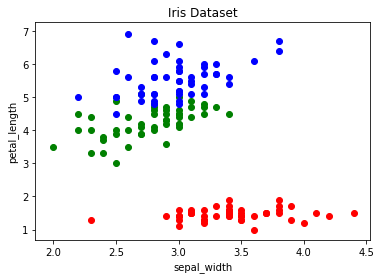

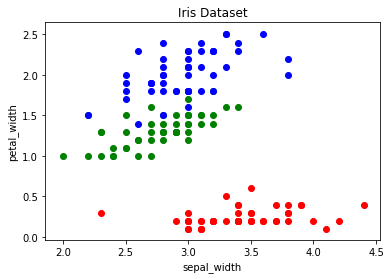

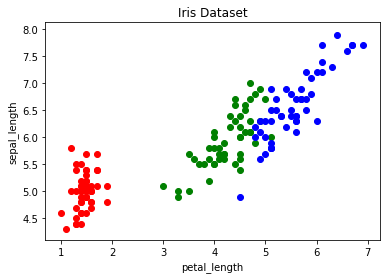

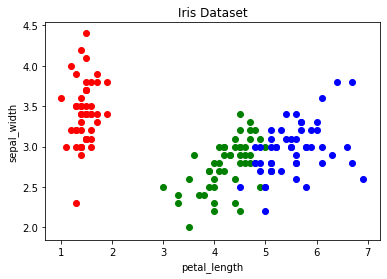

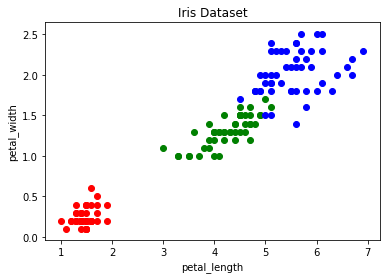

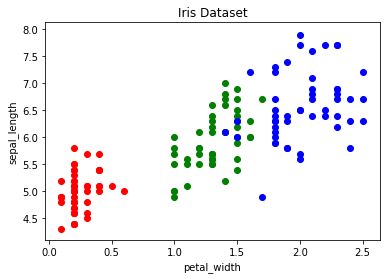

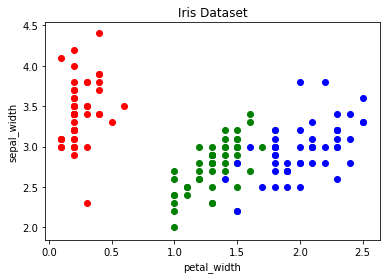

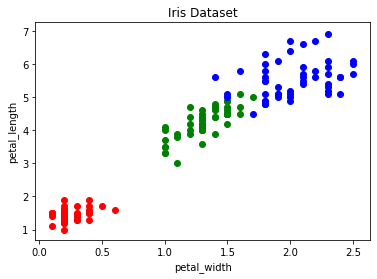

In [106]:
for v1 in iris.columns[:-1]:
    for v2 in iris.columns[:-1]:
        if v1 == v2:
            continue
        else:
            scatter_plot(v1, v2)